## Data cleaning and Visualisation

First we will be importing packages and modules so as to clean the gathered raw data and help to visualize the data

In [1]:
#importing packages and modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

Reading the raw data from the excel sheets on the different types of Apps from the playstore along with the Reviews of those Apps

In [2]:
#read data from the csv files 
#google play store apps data file
read_gps = pd.read_csv("dataset/googleplaystore.csv")
#google play store apps review file
read_gps_review = pd.read_csv("dataset/newsentimentreviews.csv")

In [3]:
#print the first 5 data from the data file
read_gps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
#print the first 5 data from the review file
read_gps_review.head()

,Unnamed: 0,App,Translated_Review,Sentiment,polarity,subjectivity
0,0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,positive,1.00,0.533333
1,1,10 Best Foods for You,This help eating healthy exercise regular basis,positive,0.25,0.288462
2,3,10 Best Foods for You,Works great especially going grocery store,positive,0.40,0.875000
3,4,10 Best Foods for You,Best idea us,positive,1.00,0.300000
4,5,10 Best Foods for You,Best way,negative,1.00,0.300000


In [5]:
#shape of dataset files
print("Shape of dataset googleplaystore.csv file is : ",read_gps.shape)
print("Shape of dataset googleplaystore_user_review file is : ",read_gps_review.shape)

Shape of dataset googleplaystore.csv file is :  (10841, 13)
Shape of dataset googleplaystore_user_review file is :  (37427, 6)


In [6]:
#columns in dataframe : read_gps
read_gps.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [7]:
#columns in dataframe : read_gps
read_gps_review.columns

Index(['Unnamed: 0', 'App', 'Translated_Review', 'Sentiment', 'polarity',
       'subjectivity'],
      dtype='object')

In [8]:
#function clean_null_data remove rows which cannot fill by int and if it can be fill by int or float, function fill those value by mean value of the column
def clean_null_data(dataset):
    '''columns = columns name of the dataset'''
    '''dataset = dataset for clean null data '''
    print('cleaning data....')
    col = []
    for i in dataset.columns:
        print("Column",i,'\nData Type : ',dataset[i].dtype,'\tnull ? :',dataset[i].isnull().any())
        if dataset[i].isnull().any() == True:
            col.append(i)
# drop the null values
    print('Drop the null values...')
    dataset = dataset.dropna()
    return dataset

#### cleaning the data and checking if there are null values for the data file and if there are, then we are removing the Null Values from our 2 datasets

In [9]:
clean_gps = clean_null_data(read_gps)

cleaning data....
Column App 
Data Type :  object 	null ? : False
Column Category 
Data Type :  object 	null ? : False
Column Rating 
Data Type :  float64 	null ? : True
Column Reviews 
Data Type :  object 	null ? : False
Column Size 
Data Type :  object 	null ? : False
Column Installs 
Data Type :  object 	null ? : False
Column Type 
Data Type :  object 	null ? : True
Column Price 
Data Type :  object 	null ? : False
Column Content Rating 
Data Type :  object 	null ? : True
Column Genres 
Data Type :  object 	null ? : False
Column Last Updated 
Data Type :  object 	null ? : False
Column Current Ver 
Data Type :  object 	null ? : True
Column Android Ver 
Data Type :  object 	null ? : True
Drop the null values...


In [10]:
# cleaning the data and checking if there are null values for the review file
clean_gps_review = clean_null_data(read_gps_review)

cleaning data....
Column Unnamed: 0 
Data Type :  int64 	null ? : False
Column App 
Data Type :  object 	null ? : False
Column Translated_Review 
Data Type :  object 	null ? : False
Column Sentiment 
Data Type :  object 	null ? : False
Column polarity 
Data Type :  float64 	null ? : False
Column subjectivity 
Data Type :  float64 	null ? : False
Drop the null values...


In [11]:
#check the dataset is cleaned or not
clean_gps.isnull().any()

App               False
Category          False
Rating            False
Reviews           False
Size              False
Installs          False
Type              False
Price             False
Content Rating    False
Genres            False
Last Updated      False
Current Ver       False
Android Ver       False
dtype: bool

In [12]:
#Check the clean google play store review dataset contain any null values
clean_gps_review.isnull().any()

Unnamed: 0           False
App                  False
Translated_Review    False
Sentiment            False
polarity             False
subjectivity         False
dtype: bool

# Data visualization

Using different visualization techniques to get a better picture for the Model and to understand the picture from the datasets much better.

In [13]:
# seperate the category in the data
by_category = clean_gps['Category'].value_counts()
by_category.head()

FAMILY          1746
GAME            1097
TOOLS            733
PRODUCTIVITY     351
MEDICAL          350
Name: Category, dtype: int64

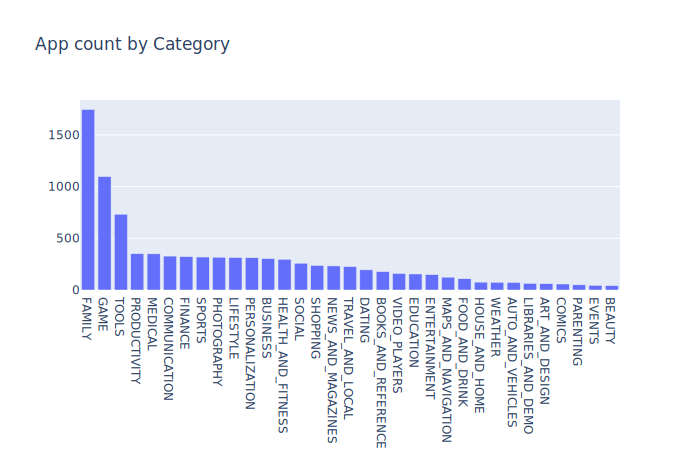

In [14]:
# using plotly to plot a bar graph for index vs values in category
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected = True)
import plotly.graph_objs as pl
x_lab = by_category.index
y_lab = by_category.values
data = pl.Bar(x=x_lab,y=y_lab)
data = [data]
layout = pl.Layout({"title":"App count by Category"})
fig = pl.Figure(data = data,layout=layout)
fig.show('svg')

From the plot we can see that most Apps are of Family category while the Beauty category had the least number of Apps

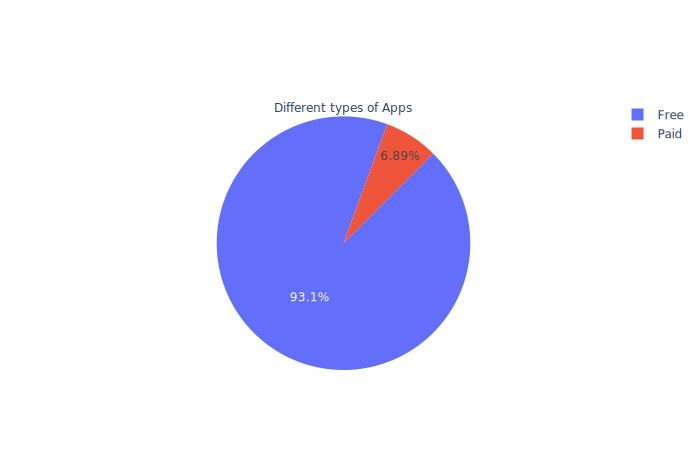

In [15]:
# used plotly to plot a pie chart to show the visual representation of type vs values
types = list(clean_gps['Type'].value_counts().index)
values = list(clean_gps['Type'].value_counts().values)
trace = pl.Pie(labels=types,values=values,title = 'Different types of Apps',rotation=45)
data = [trace]
fig = pl.Figure(data = data)
fig.show('svg')

#### We have used Pie chart to represent how many Apps are free as compared to those which are paid.
From our datasets we can gather 93.1% of Apps are free while the rest 6.89% of Apps are the paid ones in the Google Playstore

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text xticklabel objects>)

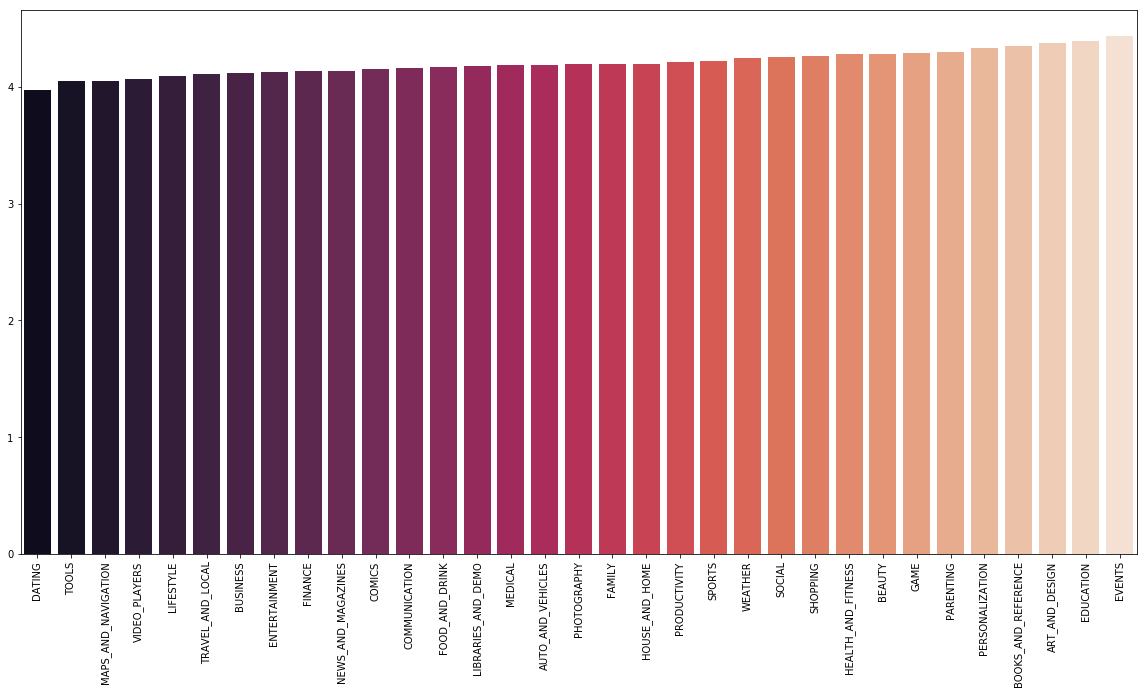

In [16]:
# grouping by category, rating of the movies by genre index values a bar graph is plotted using seaborn
groupby_cat = clean_gps.groupby('Category').mean()
apptype = dict()
for i in range(len(groupby_cat.index)):
    apptype[groupby_cat.index[i]] = groupby_cat['Rating'].values[i]
sorted_dict = sorted(apptype.items(),key=lambda x: x[1])
x,y = zip(*sorted_dict)
plt.figure(figsize=(20,10))
sns.barplot(list(x),list(y),palette='rocket')
plt.xticks(rotation=90)

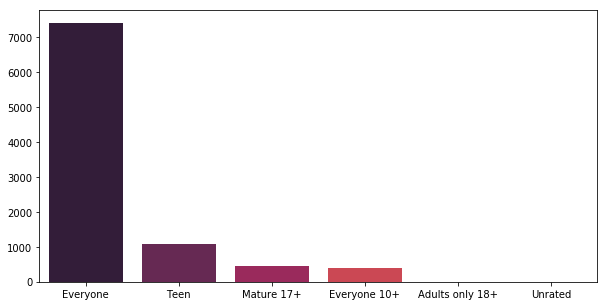

In [17]:
# bar graph is being plotted to show the the total ratings and which age group people have preferred to watch it
plt.figure(figsize=(10,5))
content_ratings = clean_gps['Content Rating'].value_counts().index
content_ratings_values = clean_gps['Content Rating'].value_counts().values
sns.barplot(x=content_ratings,y=content_ratings_values,palette='rocket')

The graph above shows the reviews of the people for every age group that has watched the movie. there are many reviews from most of the people but the teens and mature +17 have lesser reviews given. 

In [18]:
# function written to filter the rating by particular case: art-and-design, Family, Game
def plot_by_cate(category,dataset):
    for i in category:
        filter_data = dataset[dataset.Category == i]
        data = filter_data['Rating']
        plt.figure(figsize=(10,5))
        plt.title(' '+i+' Ratings')
        sns.barplot(data.value_counts().index,data.value_counts().values,color='Blue')
        plt.xticks(rotation=90)

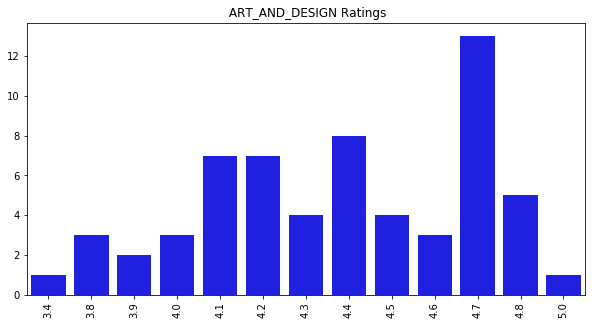

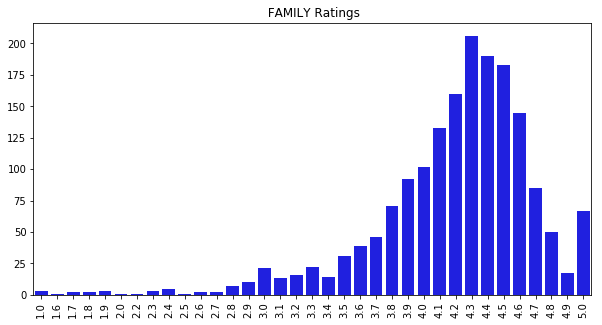

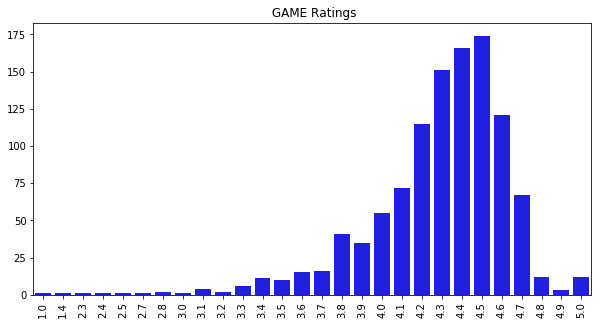

In [19]:
plot_by_cate(['ART_AND_DESIGN','FAMILY','GAME'],clean_gps)

#### The above first graph shows the highest of 4.7 rating for art-and-design 12+ values.
#### The second graph is for family ratings with the highest of 4.3 rating from 200+  values.
#### The third graph is for Game ratings with the highest of 4.5 rating from 175 index values

In [20]:
# this function is to fing the highest and the lowest rating from category
def data_filter(cat,dataf):
    data = dataf[dataf['Category'] == cat]
    data = pd.DataFrame(data[['Category','App','Rating']])
    data = data.sort_values(by = 'Rating')
    lowest_ratings = data.head(1)
    higest_ratings = data.tail(1)
    return higest_ratings,lowest_ratings

In [21]:

high,low = data_filter('FAMILY',clean_gps)

In [24]:
print('The highest rated Application is ',high['App'].values[0],'\n The lowest rated Application is ',low['App'].values[0])

The highest rated Application is  Fr. Mike Schmitz Audio Teachings 
 The lowest rated Application is  FE Mechanical Engineering Prep


We found out the highest rated application as compared to the lowest rated application

In [25]:
X = clean_gps[['Reviews','Category','Type','Installs','Size','Price']]
Y = clean_gps['Rating']
X = pd.get_dummies(data=X, drop_first=True)

In [26]:
#splitting the data into train and test model of X,Y
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .20, random_state = 40)
regr = linear_model.LinearRegression() # Do not use fit_intercept = False if you have removed 1 column after dummy encoding\n",
regr.fit(X_train, Y_train)
predicted = regr.predict(X_test)

In [27]:
#converting the ratings data type to float 
clean_gps['Rating'] = pd.to_numeric(clean_gps['Rating'], errors='coerce')
clean_gps['Rating'].dtype

C:\Users\Arth Patel\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



dtype('float64')

In [28]:
#converting the Reviews data type to float 
clean_gps['Reviews'] = clean_gps['Reviews'].astype('float64')
clean_gps['Reviews'].dtype

C:\Users\Arth Patel\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



dtype('float64')

In [29]:
#rounding of the float vales
clean_gps['Size'] = clean_gps['Size'].map(lambda x: x.rstrip('M'))
clean_gps['Size'] = clean_gps['Size'].map(lambda x: str(round((float(x.rstrip('k'))/1024), 3)) if x[-1]=='k' else x)
clean_gps['Size'] = clean_gps.Size.replace("Varies with device",np.nan)
clean_gps['Size'].dtype

C:\Users\Arth Patel\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\Arth Patel\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\Arth Patel\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/ind

dtype('O')

In [30]:
#converting the size data type to float
clean_gps['Size'] = clean_gps['Size'].astype('float64')
clean_gps['Size'].dtype

C:\Users\Arth Patel\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



dtype('float64')

In [31]:
clean_gps['Installs'] = clean_gps['Installs'].map(lambda x: x.rstrip('+'))
clean_gps['Installs'] = clean_gps['Installs'].map(lambda x: ''.join(x.split(',')))
clean_gps['Installs'] = clean_gps['Installs'].astype('float64')
clean_gps['Installs'].dtype

C:\Users\Arth Patel\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\Arth Patel\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\Arth Patel\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/ind

dtype('float64')

In [32]:
#get the unique values from the list(Installs)
clean_gps['Installs'].unique()

array([1.e+04, 5.e+05, 5.e+06, 5.e+07, 1.e+05, 5.e+04, 1.e+06, 1.e+07,
       5.e+03, 1.e+08, 1.e+09, 1.e+03, 5.e+08, 1.e+02, 5.e+02, 1.e+01,
       5.e+00, 5.e+01, 1.e+00])

In [33]:
#get the unique values from the list(Price)
clean_gps['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$7.99', '$5.99', '$2.99', '$3.49',
       '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49', '$10.00',
       '$24.99', '$11.99', '$79.99', '$16.99', '$14.99', '$29.99',
       '$12.99', '$2.49', '$10.99', '$1.50', '$19.99', '$15.99', '$33.99',
       '$39.99', '$3.95', '$4.49', '$1.70', '$8.99', '$1.49', '$3.88',
       '$399.99', '$17.99', '$400.00', '$3.02', '$1.76', '$4.84', '$4.77',
       '$1.61', '$2.50', '$1.59', '$6.49', '$1.29', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$8.49', '$1.75', '$14.00', '$2.00',
       '$3.08', '$2.59', '$19.40', '$3.90', '$4.59', '$15.46', '$3.04',
       '$13.99', '$4.29', '$3.28', '$4.60', '$1.00', '$2.95', '$2.90',
       '$1.97', '$2.56', '$1.20'], dtype=object)

In [34]:
# removing the $ sign from the price for better plotting
clean_gps['Price'] = clean_gps['Price'].map(lambda x: x.strip('$'))
clean_gps['Price'] =  clean_gps['Price'].astype('float64')
clean_gps['Price'].dtype

C:\Users\Arth Patel\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\Arth Patel\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



dtype('float64')

In [35]:
#  LabelEncoder used to normalize labels
le = LabelEncoder()
clean_gps["Content_numerical"] = le.fit_transform(clean_gps["Content Rating"])

C:\Users\Arth Patel\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [36]:
#Adults only 18+ = 0 , Everyone = 1 , Everyone 10+ = 2 , Mature 17+ = 3 , Teen = 4
clean_gps['Content Rating'].unique(),clean_gps['Content_numerical'].unique()

(array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
        'Adults only 18+', 'Unrated'], dtype=object),
 array([1, 4, 2, 3, 0, 5], dtype=int64))

In [37]:
#converting data of Category columns in numaric using labelencoder
clean_gps['Category_numerical'] = le.fit_transform(clean_gps['Category'])

C:\Users\Arth Patel\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [38]:
clean_gps['Category_numerical'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 12, 13, 15, 16, 17, 18,
       14, 11, 20, 27, 26, 24, 28, 30, 29, 23, 25, 22, 32, 31, 21, 19],
      dtype=int64)

In [39]:
#export to cleaned_data_googleplaystore.csv
clean_gps.to_csv('dataset/cleaned_data_googleplaystore.csv')